# qrand

> A quantum random number generator for arbitrary probability distributions


In [1]:
!pip install -q qrand
!pip install -q matplotlib

[![Unitary Fund](https://img.shields.io/badge/Supported_By-UNITARY_FUND-FFF000.svg?style=flat)](http://unitary.fund)

[![YouTube](https://img.shields.io/badge/PR-qrand-FF0000.svg?style=flat&logo=YouTube&logoColor=white)](https://youtu.be/CG7BxuWFpME)

[![PyPI](https://img.shields.io/pypi/v/qrand?label=PyPI&style=flat&color=3776AB&logo=Python&logoColor=white)](https://pypi.org/project/qrand/)

[![Coverage](https://img.shields.io/badge/Coverage-97%25-green.svg?style=flat)](http://pytest.org)

[![Apache-2.0 License](https://img.shields.io/github/license/pedrorrivero/qrand?label=License&style=flat&color=1D1D1D)](https://github.com/pedrorrivero/qrand/blob/master/LICENSE)


Random numbers are everywhere.

Computer algorithms, data encryption, physical simulations, and even the arts use them all the time. There is one problem though: it turns out that they are actually very difficult to produce in large amounts. Classical computers can only implement mathematical tricks to emulate randomness, while measuring it out of physical processes turns out to be too slow.

Luckily, the probabilistic nature of quantum computers makes these devices particularly useful for the task. Nonetheless, most of the current efforts in producing quantum random numbers have been focused on uniform probability distributions. Despite this fact, many applications actually need to sample from more complex distributions (e.g. gaussian, poisson).

This software introduces an interface layer between [NumPy](https://numpy.org/) and [Qiskit](https://qiskit.org/), along with some useful functionality that enables the production of quantum random numbers (QRN) for a wide variety of probability distributions. This is ultimately accomplished by transforming uniform probability distributions produced in IBMQ's quantum devices, through NumPy's random module.

In [2]:
from qrand import QiskitBitGenerator, Qrng
from numpy.random import Generator
from qiskit import IBMQ

## QiskitBitGenerator
A quantum random bit-generator based on Qiskit, which can interface with NumPy's random module (e.g. to instantiate Generator objects). It implements an efficient strategy to retrieve random bits from IBMQ's quantum backends.

On each request to a backend, it retrieves as many bits as possible and stores them in a cache. This way, the number of internet connections leading to overheads is greatly reduced and, while the cache is loaded, random bits can be retrieved "instantaneously". The user can limit the number of bits to retrieve on each request through the `max_bits_per_request` argument.

Additionally, it always chooses the least busy backend from the list of available machines. This list can be filtered by the user through the `backend_filter` argument, which defaults to history-enabled non-simulators. If a Qiskit Backend is explicitly passed in as argument, no backend selection will be performed: effectively ignoring any Qiskit Provider object passed. If neither `provider` nor `backend` are passed as inputs, it will default to running Qiskit BasicAer's 'qasm_simulator' locally.

### CLASS ARGUMENTS
- **provider**: *Optional[Provider] = None* <br/>
  A Qiskit Provider object to access quantum backends. If `None` it defaults to BasicAer.
- **backend**: *Optional[Backend] = None* <br/>
  A Qiskit Backend object to produce random bits. If not `None`, `provider` will be ignored.
- **backend_filter**: *Optional[BackendFilter] = None* <br/>
  A Callable that takes in a Qiskit Backend object and returns `True` if it meets certain requirements, `False` otherwise. This is used to filter the list of available backends from which to dynamically choose on each request to the `provider` (if no `backend` is explicitly input). If `None` it defaults to `QiskitBitGenerator.default_backend_filter`.
- **max_bits_per_request**: *int = 0* <br/>
  A limit to the number of bits to be retrieved on each request to any Qiskit Backend. If less than one, no bound will be applied and the maximum allowed number of bits will be retrieved.
- **ISRAW32**: *Final[bool] = False* <br/>
  Toggle 32-bit BitGenerator mode. If `False` the BitGenerator will be 64-bit. This determines the number of bits returned by NumPy's `random_raw()` method, and the default number of bits to output on `random_uint()` and `random_double()`. Once an object is instantiated, this cannot be overridden.

In [3]:
provider = IBMQ.load_account()
#bitgen = QiskitBitGenerator(provider)
bitgen = QiskitBitGenerator()

/Users/pedrorrivero/Desktop/210310_QRAND/.venv/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


### PUBLIC PROPERTIES
- **BITS**: *Final[int]* <br/>
  Either 32 or 64. The number of bits output by NumPy's `random_raw()` method. Final, it cannot be modified after instantiation through the ISRAW32 argument.
- **state**: *dict* <br/>
  Parsed information about the current state of the QiskitBitGenerator.

In [4]:
from json import dumps
print(f"State:\n{dumps(bitgen.state, indent=4)}")

State:
{
    "BITS": 64,
    "job_config": {
        "max_bits_per_request": null,
        "bits_per_request": 1572864,
        "n_qubits": 24,
        "shots": 65536,
        "experiments": 1
    },
    "backend_config": {
        "backend_name": "qasm_simulator",
        "credits_required": false,
        "local": true,
        "n_qubits": 24,
        "simulator": true
    },
    "bitcache": {
        "size": 0
    }
}


### STATE SETTER
- **set_state** *(self, provider: Optional[Provider] = None, backend: Optional[Backend] = None, backend_filter: Optional[BackendFilter] = None, max_bits_per_request: Optional[int] = None) -> bool*: <br/>
  Override constructor arguments. Any change must be explicitly passed as input (i.e. not `None`).
  - ARGUMENTS
    - *provider*: Optional[Provider] = None <br/>
      Same as constructor.
    - *backend*: Optional[Backend] = None <br/>
      Same as constructor.
    - *backend_filter*: Optional[BackendFilter] = None <br/>
      Same as constructor.
    - *max_bits_per_request*: Optional[int] = None <br/>
      Same as constructor.
  - RETURNS
    - *out*: bool <br/>
      `True` if any changes were made, `False` otherwise.

In [5]:
bitgen.set_state(max_bits_per_request=1000000)
print(f"State:\n{dumps(bitgen.state, indent=4)}")

State:
{
    "BITS": 64,
    "job_config": {
        "max_bits_per_request": 1000000,
        "bits_per_request": 999984,
        "n_qubits": 24,
        "shots": 41666,
        "experiments": 1
    },
    "backend_config": {
        "backend_name": "qasm_simulator",
        "credits_required": false,
        "local": true,
        "n_qubits": 24,
        "simulator": true
    },
    "bitcache": {
        "size": 0
    }
}


### BIT CACHE
- **load_cache** *(self, bitstring: str, flush: bool = False) -> bool*: <br/>
  Load cache contents from bitstring.
  - ARGUMENTS
    - *bitstring*: str <br/>
      The bitstring to load to cache.
    - *flush*: bool = False <br/>
      If `True` erase cache before loading.
  - RETURNS
    - *out*: bool <br/>
      `True` if succeeds, `False` otherwise.
  - RAISES
    - *TypeError* <br/>
      If input bitstring is not str
    - *ValueError* <br/>
      If input bitstring is not a valid bitstring

In [6]:
bitgen.load_cache('111010010101011001010010') # Loading 24 bits
print(f"bitcache:\n{dumps(bitgen.state['bitcache'], indent=4)}")

bitcache:
{
    "size": 24
}


### BIT CACHE
- **dump_cache** *(self, flush: bool = False) -> str*: <br/>
  Returns all the contents stored in the cache.
  - ARGUMENTS
    - *flush*: bool = False <br/>
      If `True` erase the cache after dumping.
  - RETURNS
    - *out*: str <br/>
      The bitstring stored in cache.
- **flush_cache** *(self) -> bool*: <br/>
  Erase the cache.
  - RETURNS
    - *out*: bool <br/>
      `True` if succeeds, `False` otherwise.

In [7]:
print(f"dump: {bitgen.dump_cache()}")
print(f"Random Bitstring: {bitgen.random_bitstring(4)}")
print(f"bitcache:\n{dumps(bitgen.state['bitcache'], indent=4)}")
print(f"dump: {bitgen.dump_cache()}")
bitgen.flush_cache()
print(f"bitcache:\n{dumps(bitgen.state['bitcache'], indent=4)}")

dump: 111010010101011001010010
Random Bitstring: 1110
bitcache:
{
    "size": 20
}
dump: 10010101011001010010
bitcache:
{
    "size": 0
}


### RANDOM GENERATION
- **random_bitstring** *(self, n_bits: int = 0) -> str*: <br/>
  Returns a random bitstring of a given lenght.
  - ARGUMENTS
    - *n_bits*: int = 0 <br/>
      Number of bits to retrieve. If less than one it defaults to the raw number of bits for the instance QiskitBitGenerator (i.e. 32 or 64).
  - RETURNS
    - *out*: str <br/>
      Bitstring of lenght `n_bits`.
- **random_double** *(self, n: float = 1) -> float*: <br/>
  Returns a random double from a uniform distribution in the range [0,n). Defaults to [0,1).
  - ARGUMENTS
    - *n*: float = 1 <br/>
      Size of the range [0,n) from which to draw the random number.
  - RETURNS
    - *out*: float <br/>
      Random float in the range [0,n).
- **random_raw** *(self) -> int*: <br/>
  Returns a random unsigned int of either 32 or 64 bits.
  - RETURNS
    - *out*: int <br/>
      Unsigned int of either 32 or 64 bits.
- **random_uint** *(self, n_bits: int = 0) -> int*: <br/>
  Returns a random unsigned int of a given size in bits.
  - ARGUMENTS
    - *n_bits*: int = 0 <br/>
      Number of bits to retrieve. If less than one it defaults to the raw number of bits for the instance QiskitBitGenerator (i.e. 32 or 64).
  - RETURNS
    - *out*: int <br/>
      Unsigned int of `n_bits` bits.

In [8]:
print(f"Random Raw: {bitgen.random_raw()}")
print(f"Random Bitstring: {bitgen.random_bitstring()}")
print(f"Random Unsigned Int: {bitgen.random_uint()}")
print(f"Random Double: {bitgen.random_double()}")

Random Raw: 13722587822689101689
Random Bitstring: 0001101110110110000011111000100111010001101110101111010101010111
Random Unsigned Int: 17033090633511344387
Random Double: 0.7020323614061412


## Qrng
An integrated implementation of the QRNG PyPI package which makes use of QRAND's enhanced random bit generation and caching capabilities.

In [9]:
qrng = Qrng(bitgen)

In [10]:
print(f"Random complex: {qrng.get_random_complex_rect()}")
print(f"Random complex from polar: {qrng.get_random_complex_polar(2, 3.14)}")
print(f"Random double: {qrng.get_random_double(-0.1, 1.4)}")
print(f"Random integer: {qrng.get_random_int(-2, 5)}")

Random complex: (0.9414973258972168+0.804682731628418j)
Random complex from polar: (0.179934525004025+1.8482485313497816j)
Random double: 0.4238922520880293
Random integer: -2


## Numpy interface

In [11]:
# NumPy generator object
gen = Generator(bitgen)

In [12]:
print(f"Random Binomial: {gen.binomial(4, 1/4)}")
print(f"Random Exponential: {gen.exponential()}")
print(f"Random Logistic: {gen.logistic()}")
print(f"Random Poisson: {gen.poisson()}")
print(f"Random Std. Normal: {gen.standard_normal()}")
print(f"Random Triangular: {gen.triangular(-1, 0, 1)}")

Random Binomial: 1
Random Exponential: 1.2132634294980102
Random Logistic: 0.6484377113221256
Random Poisson: 0
Random Std. Normal: 0.8463872270806474
Random Triangular: 0.2033479858814563


In [13]:
from matplotlib import pyplot as plt
import pandas as pd

<AxesSubplot:ylabel='Frequency'>

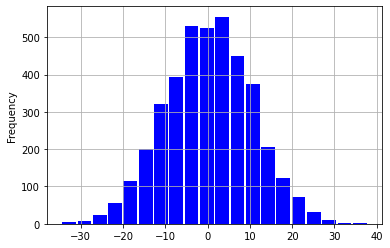

In [14]:
# GAUSSIAN
samples = pd.Series(gen.normal(0, 10, 4000))
samples.plot.hist(grid=True, bins=20, rwidth=0.9, color='blue')

<AxesSubplot:ylabel='Frequency'>

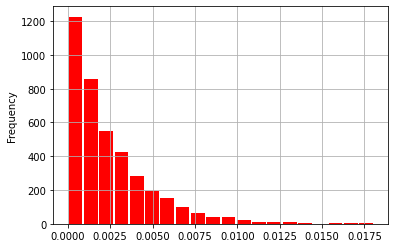

In [15]:
# PARETO
samples = pd.Series(gen.pareto(400, 4000))
samples.plot.hist(grid=True, bins=20, rwidth=0.9, color='red')

<AxesSubplot:ylabel='Frequency'>

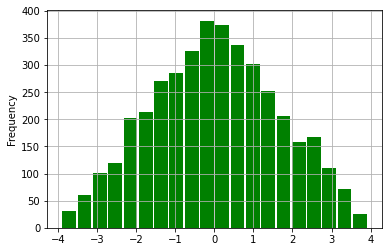

In [16]:
# TRIANGULAR
samples = pd.Series(gen.triangular(-4, 0, 4, 4000))
samples.plot.hist(grid=True, bins=20, rwidth=0.9, color='green')

In [17]:
print(f"State:\n{dumps(bitgen.state, indent=4)}")

State:
{
    "BITS": 64,
    "job_config": {
        "max_bits_per_request": 1000000,
        "bits_per_request": 999984,
        "n_qubits": 24,
        "shots": 41666,
        "experiments": 1
    },
    "backend_config": {
        "backend_name": "qasm_simulator",
        "credits_required": false,
        "local": true,
        "n_qubits": 24,
        "simulator": true
    },
    "bitcache": {
        "size": 218285
    }
}


Since $216173 < 256000 = 4000·64$ on the next call the bit generator will need to produce new random numbers.

<AxesSubplot:ylabel='Frequency'>

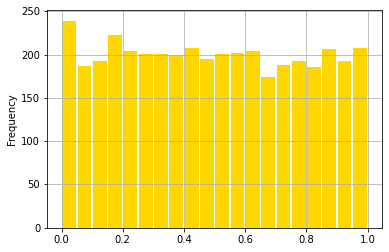

In [18]:
# UNIFOROM
samples = pd.Series(gen.random(4000))
samples.plot.hist(grid=True, bins=20, rwidth=0.9, color='gold')